In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.stats import uniform
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv("dataset/data.csv")

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.drop(labels=[data.columns[0],data.columns[-1]],axis=1,inplace=True)

In [7]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
data[data.columns[0]].replace(to_replace=['B','M'],value=[0,1],inplace=True)

/tmp/ipykernel_2060/990141940.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[data.columns[0]].replace(to_replace=['B','M'],value=[0,1],inplace=True)
/tmp/ipykernel_2060/990141940.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[data.columns[0]].replace(to_replace=['B','M'],value=[0

In [9]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


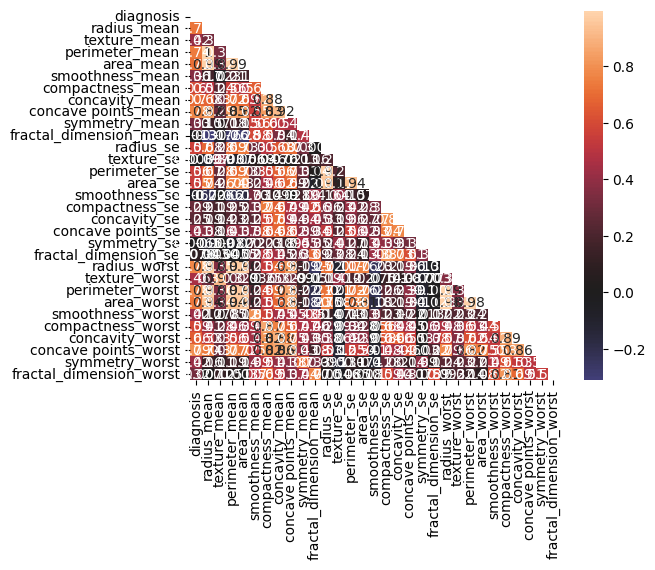

In [11]:
data_corr = data.corr()
upper_traingle_mask = np.triu(np.ones_like(data_corr,dtype=bool))
sns.heatmap(data=data_corr,center=0,annot=True,square=True,xticklabels=True,yticklabels=True,mask=upper_traingle_mask)
plt.show()

In [12]:
selected_features = list(data_corr[(data_corr[data.columns[0]] < -0.5) | (data_corr[data.columns[0]] > 0.5)].index)

In [13]:
selected_features

['diagnosis',
 'radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

In [14]:
refined_data = data[selected_features]

In [15]:
refined_data

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216
565,1,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628
566,1,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418
567,1,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650


In [17]:
X = refined_data.drop('diagnosis', axis=1)
y = refined_data['diagnosis']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
ml_algorithms = {
    "LogReg": LogisticRegression(max_iter=10000),
    "DecTree": DecisionTreeClassifier(),
    "RandForest": RandomForestClassifier(),
    "SVM": SVC(),
    "NB": GaussianNB()
}

In [22]:
performance_log = []

for algo_name, clf in ml_algorithms.items():
    model_pipeline = make_pipeline(StandardScaler(), clf)
    model_pipeline.fit(X_train, y_train)
    y_preds = model_pipeline.predict(X_test)

    performance_log.append({
        "Algorithm": algo_name,
        "Acc": accuracy_score(y_test, y_preds),
        "Prec": precision_score(y_test, y_preds),
        "Rec": recall_score(y_test, y_preds),
        "F1": f1_score(y_test, y_preds)
    })

In [24]:
score_df = pd.DataFrame(performance_log).sort_values(by="F1", ascending=False)
print("\nEvaluation Results:\n")
print(score_df)


Evaluation Results:

    Algorithm       Acc      Prec       Rec        F1
0      LogReg  0.964912  0.953488  0.953488  0.953488
4          NB  0.964912  0.975610  0.930233  0.952381
2  RandForest  0.956140  0.952381  0.930233  0.941176
3         SVM  0.956140  0.975000  0.906977  0.939759
1     DecTree  0.938596  0.950000  0.883721  0.915663


In [26]:
forest_params = {
    "n_estimators": [80, 100, 150],
    "max_depth": [None, 8, 15],
    "min_samples_split": [2, 4]
}

rf_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=forest_params,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)
best_forest_model = rf_search.best_estimator_

print("\n GridSearch Best RandomForest Params:")
print(rf_search.best_params_)

print("\n RandomForest Classification Report:")
print(classification_report(y_test, best_forest_model.predict(X_test)))



 GridSearch Best RandomForest Params:
{'max_depth': 15, 'min_samples_split': 4, 'n_estimators': 150}

 RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
svm_param_dist = {
    "C": uniform(0.1, 10),
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

svm_random_search = RandomizedSearchCV(
    SVC(),
    param_distributions=svm_param_dist,
    n_iter=15,
    cv=5,
    scoring="f1",
    random_state=1,
    n_jobs=-1
)

svm_random_search.fit(X_train, y_train)
optimal_svm = svm_random_search.best_estimator_

print("\n RandomSearch Best SVM Params:")
print(svm_random_search.best_params_)

print("\n SVM Classification Report:")
print(classification_report(y_test, optimal_svm.predict(X_test)))


 RandomSearch Best SVM Params:
{'C': np.float64(4.067674742306699), 'gamma': 'scale', 'kernel': 'linear'}

 SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



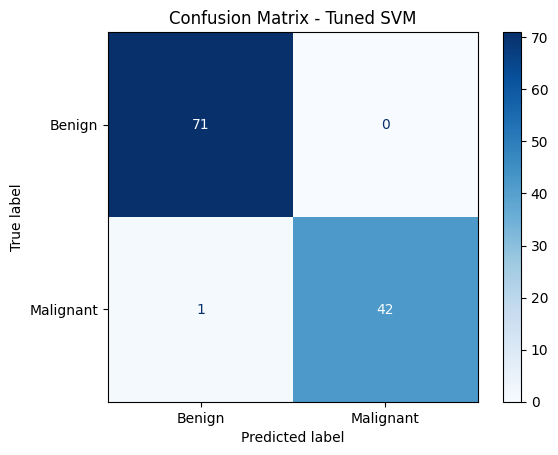

In [30]:
cm = confusion_matrix(y_test, optimal_svm.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Tuned SVM")
plt.show()

/tmp/ipykernel_2060/3130614104.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='F1', data=score_df, palette='mako')


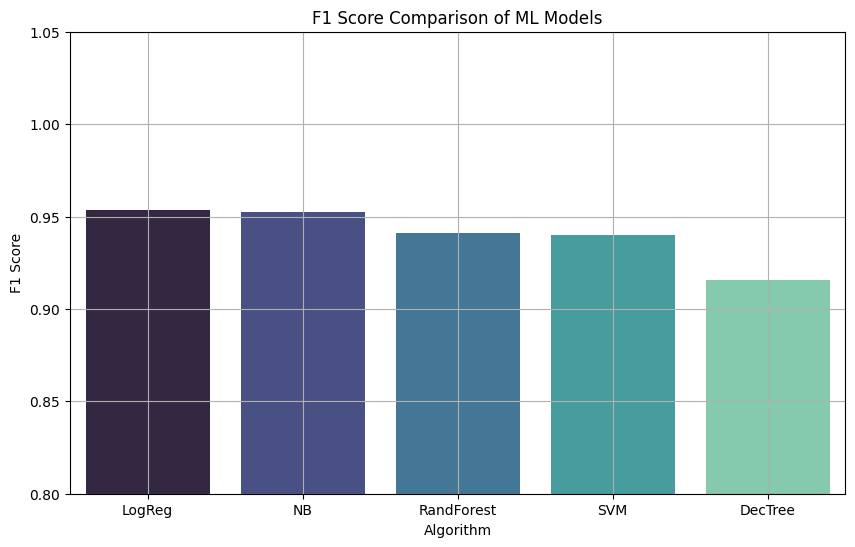

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='Algorithm', y='F1', data=score_df, palette='mako')
plt.title('F1 Score Comparison of ML Models')
plt.ylabel('F1 Score')
plt.ylim(0.8, 1.05)
plt.grid(True)
plt.show()

### i have trained five classification models and evaluated their performance using accuracy, precision, recall, and F1-score.
### Hyperparameter tuning was applied using GridSearchCV for Random Forest and RandomizedSearchCV for SVM.
### The tuned SVM model achieved the best performance with 99% accuracy and F1-score, making it the best choice for tumor classification.